In [14]:
from traj2sim import *
import math
from mpl_toolkits import mplot3d
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
        
def plot_2pc_traj(list_traj):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,1]
        ydata = list_traj[i][:,2]
        zdata = list_traj[i][:,3]
        if i%2 == 0:
            ax.scatter3D(xdata, ydata, zdata)
        else:
            ax.scatter3D(xdata, ydata, zdata)
    plt.title('Noisy Sphere Geodesics')
    plt.show()
    
def plot_3pc_traj(list_traj):
    N = len(list_traj)/3
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for i in range(len(list_traj)):
        xdata = list_traj[i][:,0]
        ydata = list_traj[i][:,1]
        zdata = list_traj[i][:,2]
        if i < 2*N:
            if i%2 == 0:
                ax.plot(xdata, ydata, zdata)
            else:
                ax.plot(xdata, ydata, zdata)
        else:
            ax.plot(xdata, ydata, zdata)
    plt.title('Noisy Sphere Geodesics')
    plt.show()
        
def sphere_point(theta, phi):
    return [math.sin(phi)*math.cos(theta), math.sin(phi)*math.sin(theta), -math.cos(phi)]

In [10]:
def great_circle_with_time(theta, length=10, noise=False, sigma=0.05, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,4))
    for i in range(0, time_f-time_i):
        traj[i][1:] = sphere_point(theta, (time_i+i)*math.pi/length)
        traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        #traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i][1:] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

def great_circle(theta, length=10, noise=False, sigma=0.005, time_i=0, time_f=10):
    traj = np.zeros((time_f-time_i,3))
    for i in range(0, time_f-time_i):
        traj[i] = sphere_point(theta, (time_i+i)*math.pi/length)
        #traj[i][0] = -np.arccos(sphere_point(theta, (time_i+i)*math.pi/length)[2])
        #traj[i][0] = sphere_point(theta, (time_i+i)*math.pi/length)[2]
        if noise == True:
            traj[i] = np.add(traj[i][1:],sigma*np.random.randn(1,3))
    return traj

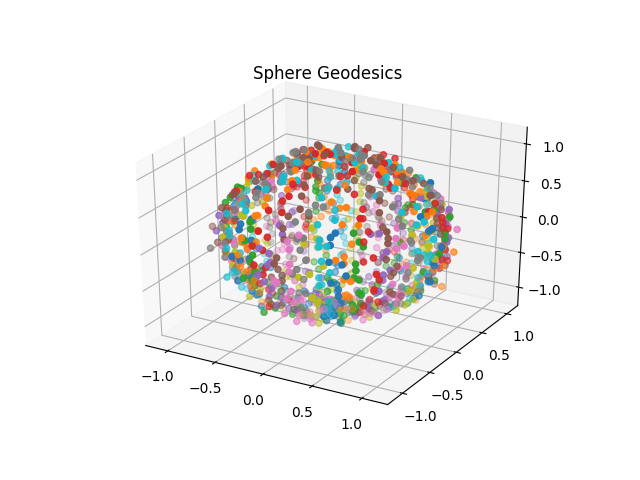

|█▉                                      | ▃▁▃ 84/1770 [5%] in 3s (26.4/s, (24.4/s, 22/1770 [1%] in 1s (24.8/s, ▇▅▃ 72/1770 [4%] in 3s (26.3/s, 77/1770 [4%] in 3s (26.7/s, 

KeyboardInterrupt: 

In [7]:
list_traj = []

a=0.7
b=0.4

N=30
length=30

for i in range(2*N):
    if i%2 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/(2*N), length, noise=1,time_i=int(0*length), time_f=int(a*length)))
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/(2*N), length, noise=1,time_i=int((1-a)*length)-1, time_f=int(1*length)-1))    

plot_2pc_traj(list_traj)

t2s = Traj2Sim()
t2s.set_trajectories(list_traj)
t2s.compute_mssd(verbose=False)

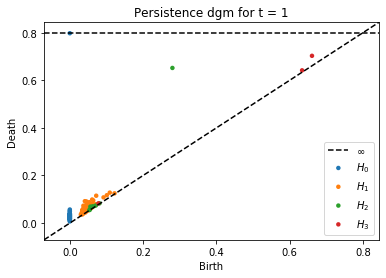

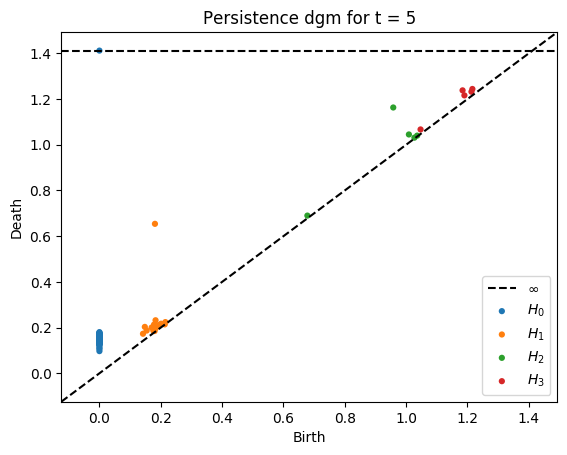

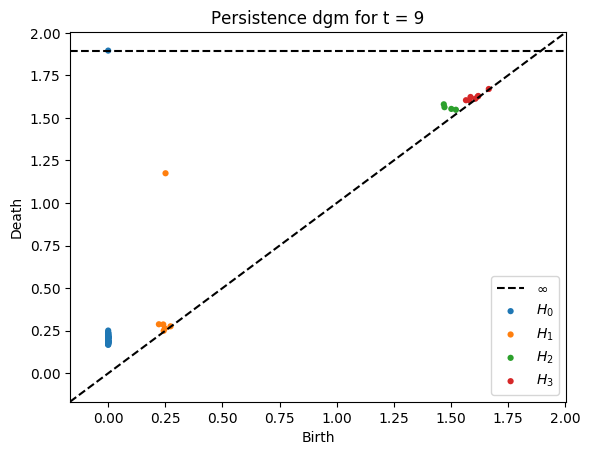

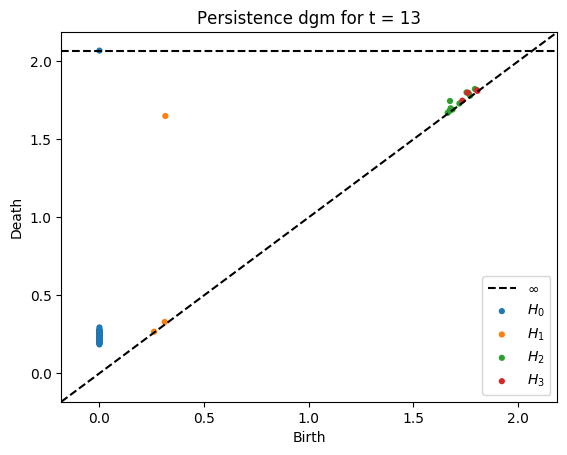

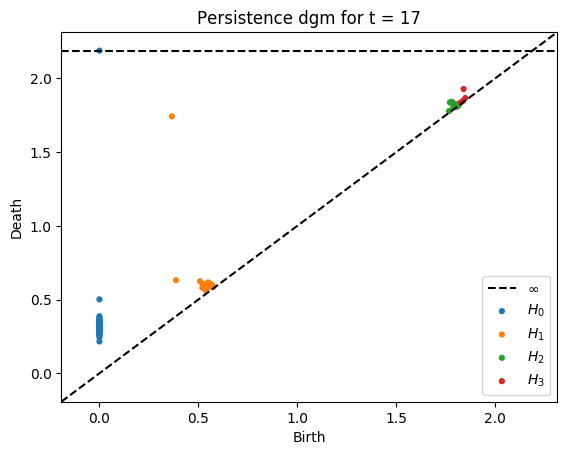

In [8]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(int(t2s.bifilt.shape[0]/4)):
    dgms = ripser(t2s.bifilt[4*i,:,:], distance_matrix=True, maxdim=3)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(4*i+1))
    plot_diagrams(dgms, show = True)

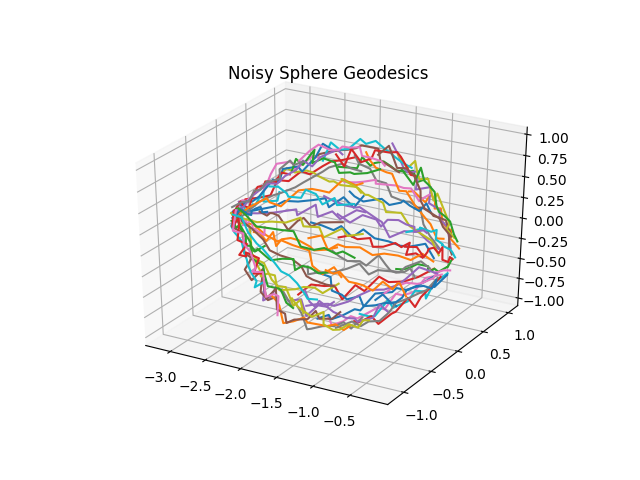

|████████████████████████████████████████| 2775/2775 [100%] in 23.0s (120.7 ▄▆█ 143/2775 [5%] in 1s (117.3/s ▆█▆ 159/2775 [6%] in 1s (117.1/s in 2s (117.5/sin 2s (120.5/▅▃▁ 309/2775 [11%] in 3s (120.0/327/2775 [12%] in 3s (120.5/ in 3s (120.7/ ▁▃▅ 456/2775 [16%] in 4s (122.1/ (123.3/ in 5s (123.6/in 5s (124.0/(124.8/ ▇▅▃ 860/2775 [31%] in 7s (124.7/▆█▆ 931/2775 [34%] in 8s (122.1/1031/2775 [37%] in 8s (122.2 (121.71197/2775 [43%] in 10s (121. 1321/2775 [48%] in 11s (121. (121. ▂▄▆ 1341/2775 [48%] in 11s (121.▅▇▇ 1361/2775 [49%] in 11s (120.▆█▆ 1566/2775 [56%] in 13s (119.▇▅▃ 1593/2775 [57%] in 13s (119.(119. 1665/2775 [60%] in 14s (118.1830/2775 [66%] in 16s (117.in 16s (118.in 16s (118. in 19s (120.▁▃▅ 2293/2775 [83%] in 19s (120.(120.(120.▆▄▂ 2712/2775 [98%] in 22s (120.


In [15]:
t2s = Traj2Sim()
list_traj = []

a=0.4
b=(1-a)/2

N=25
length=30
for i in range(3*N):
    if i%3 == 0:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(0*length), time_f=int(a*length)))
    elif i%3 == 1:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int((1-a)*length)-1, time_f=int(1*length)-1))            
    else:
        list_traj.append(great_circle_with_time(2*i*math.pi/N, length, noise=1,time_i=int(b*length), time_f=int((1-b)*length)))

plot_3pc_traj(list_traj)

t2s = Traj2Sim()
t2s.set_trajectories(list_traj)
t2s.compute_mssd(verbose=False)

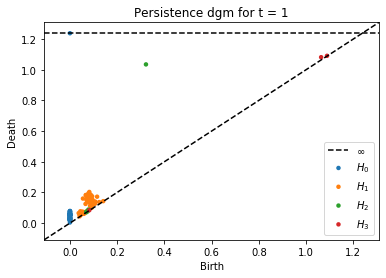

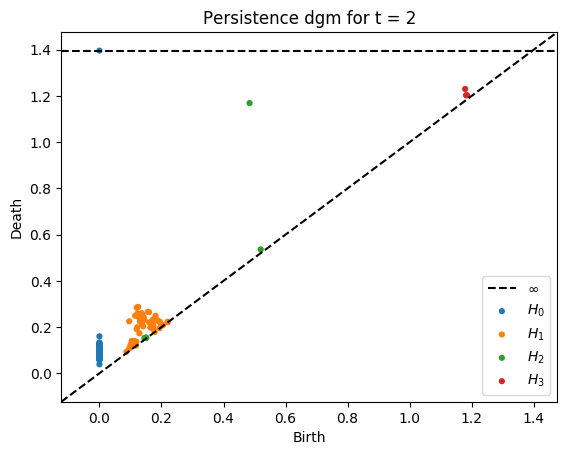

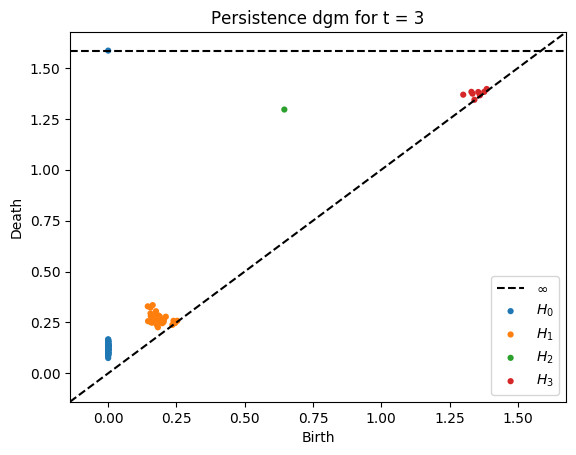

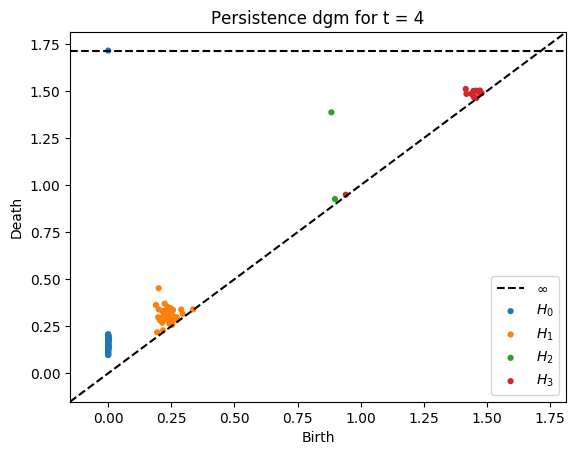

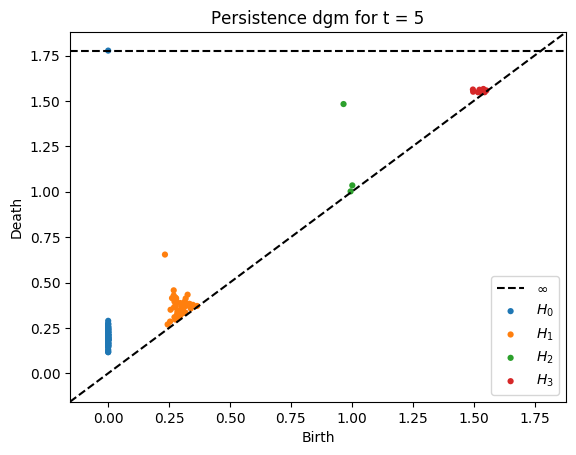

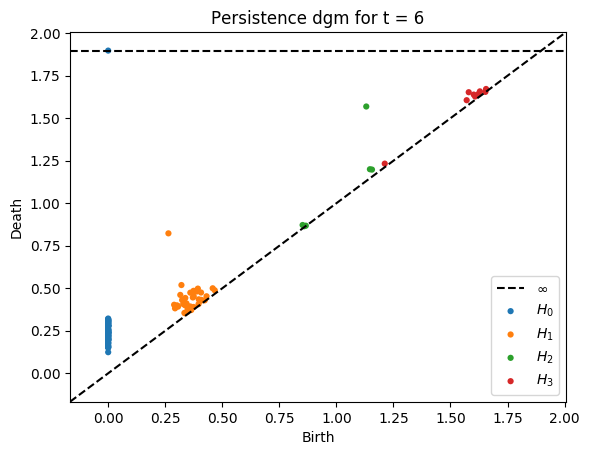

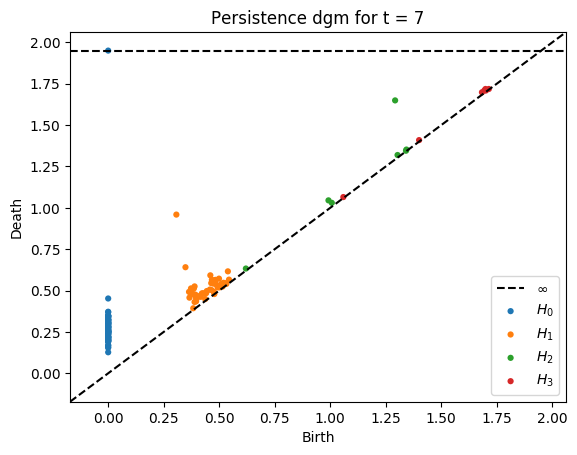

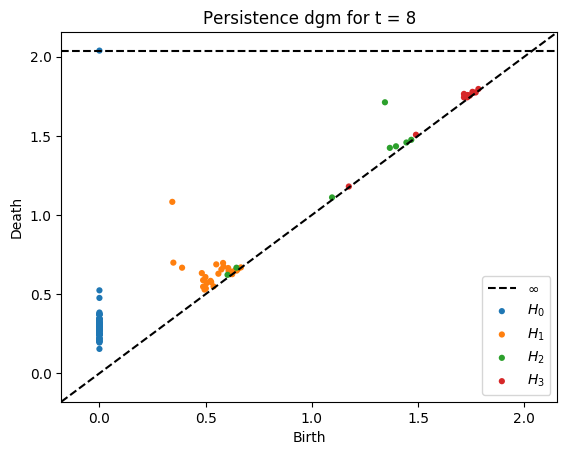

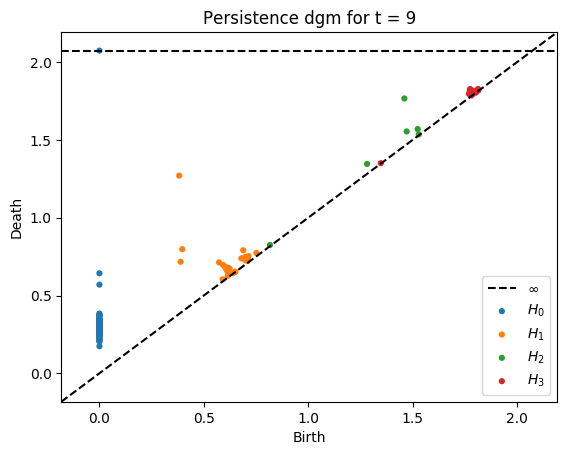

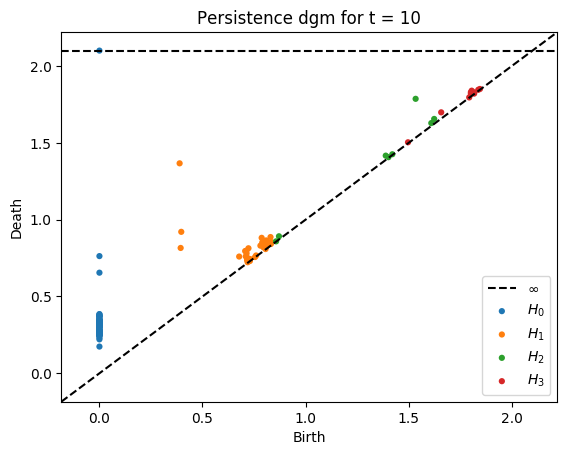

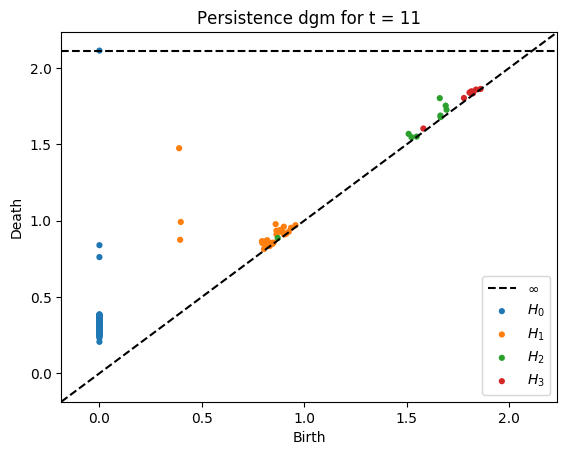

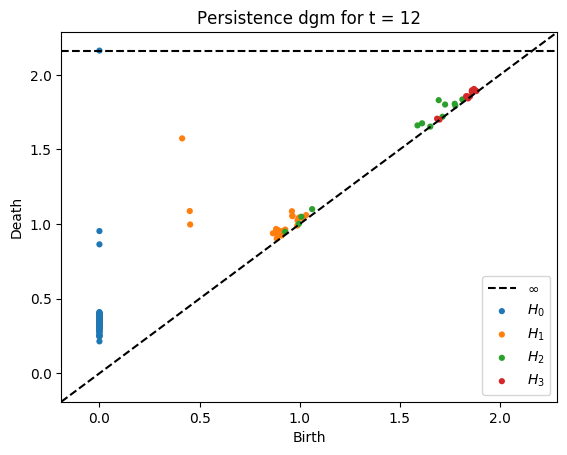

In [13]:
from ripser import ripser
from sklearn import datasets
from persim import plot_diagrams
%matplotlib inline

for i in range(int(t2s.bifilt.shape[0])):
    dgms = ripser(t2s.bifilt[i,:,:], distance_matrix=True, maxdim=3)['dgms']
    plt.clf()
    plt.title('Persistence dgm for t = '+ str(i+1))
    plot_diagrams(dgms, show = True)